> This work comes from [LearningTensorFlow.com](http://learningtensorflow.com/), developed by [dataPipeline](http://datapipeline.co.au/), with whom the copyright remains.  
For more tutorials and extended exercises, please see the website.

# Arrays

In this tutorial, we are going to work with an image, in order to visualize changes to an array. Arrays are powerful structures, as we saw briefly in the previous tutorial. Generating interesting arrays can be difficult, but images provide a great option.

To work with images, we will need matplotlib. We will also need the pillow library, which overrides the deprecated PIL library for working with images. You can install both in your environment using Anaconda’s installation method:

```
conda install matplotlib pillow
```

To load the image, we use matplotlib’s image module:

In [1]:
import matplotlib.image as mpimg

# First, load the image
filename = "images/MarshOrchid.jpg"
image = mpimg.imread(filename)
print image

[[[147 137  88]
  [148 138  89]
  [148 138  89]
  ..., 
  [143 160 116]
  [143 160 115]
  [143 160 115]]

 [[148 138  89]
  [148 138  89]
  [148 138  89]
  ..., 
  [143 160 116]
  [142 159 115]
  [142 159 114]]

 [[148 138  89]
  [148 138  89]
  [149 139  90]
  ..., 
  [143 160 116]
  [143 160 116]
  [143 160 115]]

 ..., 
 [[ 88 102  53]
  [ 87 101  52]
  [ 86 100  51]
  ..., 
  [132 128  81]
  [131 127  80]
  [130 128  80]]

 [[ 87 101  52]
  [ 86 100  51]
  [ 84  98  49]
  ..., 
  [132 128  81]
  [132 128  81]
  [131 127  80]]

 [[ 87 101  52]
  [ 85  99  50]
  [ 84  98  49]
  ..., 
  [134 127  81]
  [132 128  81]
  [131 127  80]]]


In [2]:
# Print out its shape
print(image.shape)

(5528, 3685, 3)


The above code reads in the image as a NumPy array, and prints out the size. Note that the filename needs to be a full path (absolute or relative) to the downloaded image file.

You’ll see the output, which is (5528, 3685, 3). This means the image is 5528 pixels high, 3685 pixels wide, and 3 colors “deep”.

You can view the current image using pyplot, like so:

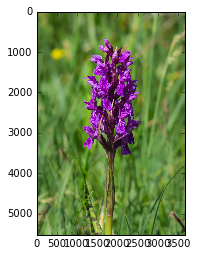

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

# Geometric Manipulations

The first transformation we will perform is a transpose, turning the image 90 degrees counter-clockwise. The full program is below, most of which you have seen.

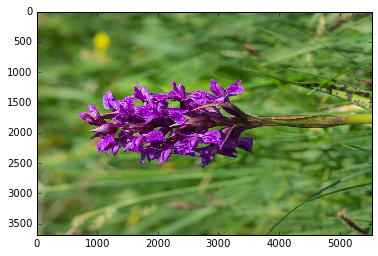

In [4]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "images/MarshOrchid.jpg"
image = mpimg.imread(filename)

# Create a Tensorflow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2])
    session.run(model)
    result = session.run(x)
        
plt.imshow(result)
plt.show()

The new bit is this line:

```python
x = tf.transpose(x, perm=[1, 0, 2])
```

This line uses TensorFlow’s ```transpose``` method, swapping the axes 0 and 1 around using the perm parameter (axis 2 stays where it is).    

The next manipulation we will do is a flip (left-right), swapping the pixels from one side to another. TensorFlow has a method for this called ```reverse_sequence```, but the signature is a bit odd. Here is what the documentation says (from that page):

> ```tf.reverse_sequence(input, seq_lengths, seq_dim, batch_dim=None, name=None)```

> Reverses variable length slices.

> This op first slices input along the dimension batch_dim, and for each slice i, reverses the first seq_lengths[i] elements along the dimension seq_dim.

> The elements of seq_lengths must obey seq_lengths[i] < input.dims[seq_dim], and seq_lengths must be a vector of length input.dims[batch_dim].

> The output slice i along dimension batch_dim is then given by input slice i, with the first seq_lengths[i] slices along dimension seq_dim reversed.

For this function, it can be best thought of as:

1. Iterate through the array according to `batch_dim`. Setting `batch_dim=0` means we go through the rows (top to bottom). For each item in the iteration
2. Slice a second dimension, denoted by `seq_dim`. Setting `seq_dim=1` means we go through the columns (left to right). The slice for the nth item in the iteration is denoted by the nth item in `seq_lengths`

Lets see it in action:

(5528, 3685, 3)


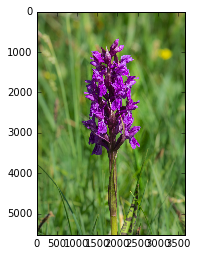

In [5]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "images/MarshOrchid.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()

The new bit is this line:

It iterates over the image top to bottom (along its height), and slices left to right (along its width). From here, it then takes a slice of size width, where width is the width of the image.

The code 

```python
np.ones((height,)) * width
``` 

creates a NumPy array filled with the value width. This is not very efficient! Unfortunately, at time of writing, it doesn’t appear that this function allows you to specify just a single value.